# Black-Scholes Options Pricing
---
## <u>Explanation</u>
The Black–Scholes model gives us the fair theoretical value of a European option, based on the underlying asset’s price, volatility, and time to expiry.
It does not predict future prices — it provides a risk-neutral valuation of the option.
---
### <u>European Call / Put</u>
The simplest options trading model is the European one. It defines two forms of option contracts.
__European options can only be exercised **at expiry**, not before.__
- **Call** – right to *buy* the underlying at strike K
- **Put** – right to *sell* the underlying at strike K

### <u>The Black-Scholes Formula</u>

#### Call Options Price
$$
C(S, t) = N(d_1) S - N(d_2) K e^{-r(T - t)}
$$

#### Put Options Price
$$
P(S, t) = K e^{-r(T - t)} N(-d_2) - S N(-d_1)
$$

#### Parameters

$$
d_1 = \frac{1}{\sigma \sqrt{T - t}} \left[ \ln \left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) (T - t) \right]
$$

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

where  
- \(S\) = current underlying price  
- \(K\) = strike price  
- \(r\) = risk-free interest rate  
- \($\sigma$\) = volatility  
- \(T - t\) = time to maturity  

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils')
from gbm import simulate_gbm_path, simulate_gbm_paths

$$
C(S, t) = N(d_1) S - N(d_2) K e^{-r(T - t)}
$$

In [ ]:
# Get the value of the call option given the asset and its strike price
def bs_call_price(S, K, r, sigma, T):
    if(T <= 0):
        return max(S - K, 0.0)
    d1 = (np.log(S/K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

$$
P(S, t) = K e^{-r(T - t)} N(-d_2) - S N(-d_1)
$$

In [ ]:
# Get the value of the put option given the asset and its strike price
def bs_put_price(S, K, r, sigma, T):
    if(T <= 0):
        return max(K - S, 0.0)
    d1 = (np.log(S/K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [28]:
# delta calculation for call and put options

def bs_delta(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    delta_call = norm.cdf(d1)
    delta_put = delta_call - 1
    return delta_call, delta_put

### Implied Volatility and its Meaning

While GBM uses ${\sigma}$ or volatility to generate the fluctuations in the asset's
price, BSM involves the usage of implied volatility, this is the volatility that 
the market is currently experiencing, i.e. once the market tells us the options price
we can backsolve the BSM equations to get the actual implied volatility
(using something like Newton Raphson), here for the sake of
simplicity we have assumed ${\sigma_{iv}}$ to be 20% (equal to ${\sigma}$).

In [29]:
# Generate prices using GBM module
S0 = 100
mu = 0.05
sigma = 0.2
dt = 1/252
T_steps = 252

prices = simulate_gbm_path(S0, mu, sigma, dt, T_steps)

# Calculate option prices along the path

K = 100 # assumed
r = 0.05 # guaranteed by the government
sigma_iv = 0.2 # implied volatility based on actual volatility in past

call_prices = []
put_prices = []

delta_calls = []
delta_puts = []

for t in range(T_steps):
    tau = (T_steps - t) * dt
    S = prices[t]
    call_prices.append(bs_call_price(S, K, r, sigma_iv, tau))
    put_prices.append(bs_put_price(S, K, r, sigma_iv, tau))

    if tau > 0:
        d_call, d_put = bs_delta(S, K, r, sigma_iv, tau)
        delta_calls.append(d_call)
        delta_puts.append(d_put)
    else:
        delta_calls.append(1 if S > K else 0)
        delta_puts.append(-1 if S < K else 0)

### Relevant Plots

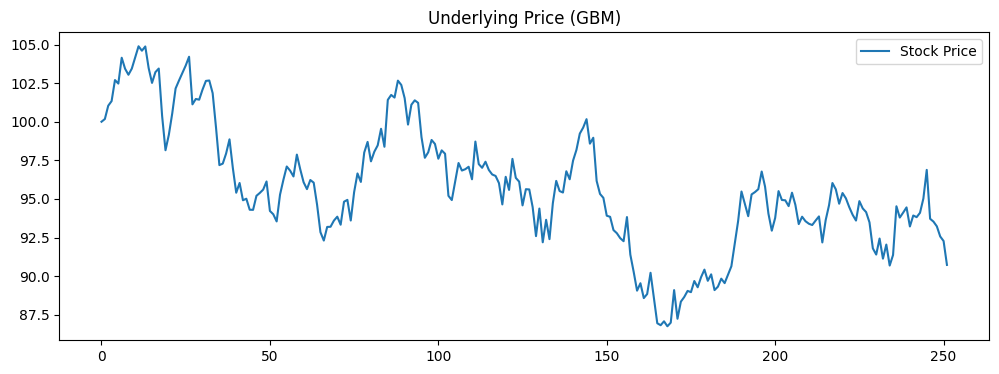

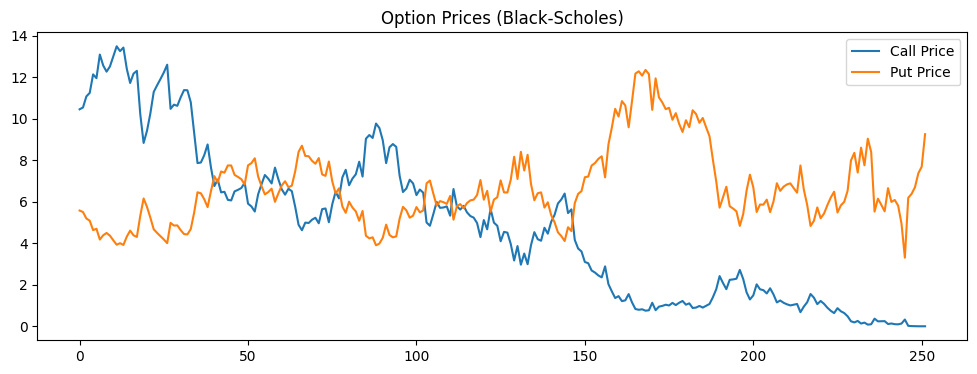

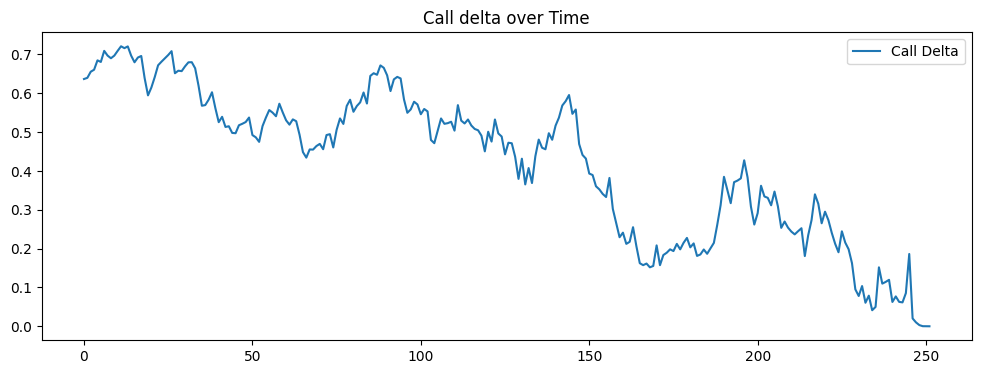

In [31]:
plt.figure(figsize=(12,4))
plt.plot(prices, label='Stock Price')
plt.title("Underlying Price (GBM)")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(call_prices, label='Call Price')
plt.plot(put_prices, label='Put Price')
plt.title("Option Prices (Black-Scholes)")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(delta_calls, label='Call Delta')
plt.title("Call delta over Time")
plt.legend()
plt.show()